**DSCI GROUP PROPOSAL**

Contributors:
>12981056 - Heather Au 
> - Connor Moynihan

In [1]:
library(tidyverse)
library (tidymodels)
library(repr)
library(ggplot2)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


**Introduction**

*Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal. 
Clearly state the question you will try to answer with your project. 
Identify and describe the dataset that will be used to answer the question*
> Within the dataset, there are three distinct varieties of wines in Italy, each characterized by 13 diverse attributes. These attributes have both statistical metrics, such as alcohol and chemical content, and observational aspects like color and hue which is given a numerical value. Our objective is to discern and categorize the wines into their respective regions by leveraging these distinctive identifiers. Therefore, our central question is to identify the 3 types of wines using the 13 wine attributes..


**Preliminary Exploratory Data Analysis**

*Demonstrate that the dataset can be read from the web into R. Clean and wrangle your data into a tidy format*

In [2]:
wine <- read_csv("wine.csv")
wine_tidy <- mutate (wine, Wine = as_factor (Wine))
wine_tidy

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Wine, Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, Flavanoids, Nonf...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


*Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.*

In [3]:
set.seed (1)

#Split the data into training and testing data
wine_split <- initial_split (wine_tidy, prop = 0.75, strata = Wine)
wine_train <- training (wine_split)
wine_test <- testing (wine_split)

wine_train_longer <- wine_train |>
    pivot_longer (
        cols = Alcohol:Proline,
        names_to = "attributes",
        values_to = "values"
    ) 

print("Count the number of obervations for each attribute")
wine_train_count <- wine_train_longer |>
    group_by (attributes) |>
    summarize (count = n())
wine_train_count

[1] "Count the number of obervations for each attribute"


attributes,count
<chr>,<int>
Acl,133
Alcohol,133
Ash,133
⋮,⋮
Phenols,133
Proanth,133
Proline,133


In [4]:
print("The average of each attribute for each wine")
wine_train_mean <- wine_train_longer |>
    group_by (Wine, attributes) |>
    summarize (average_values = mean (values))|>
    pivot_wider (
        names_from = "attributes",
        values_from = "average_values"
    )
wine_train_mean

[1] "The average of each attribute for each wine"


`summarise()` has grouped output by 'Wine'. You can override using the
`.groups` argument.


Wine,Acl,Alcohol,Ash,Color.int,Flavanoids,Hue,Malic.acid,Mg,Nonflavanoid.phenols,OD,Phenols,Proanth,Proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16.80455,13.81773,2.427045,5.481364,2.9722727,1.0463636,2.067045,106.31818,0.2895455,3.182955,2.832955,1.865000,1106.8636
2,20.14151,12.21717,2.242642,2.992075,2.0115094,1.0469811,2.003585,93.15094,0.3639623,2.767736,2.218302,1.598113,514.2453
3,21.12500,13.14222,2.423889,7.518611,0.8063889,0.6663889,3.251944,99.58333,0.4419444,1.651111,1.665556,1.163333,629.7222


In [5]:
print("Rows of missing data")
wine_train_na <- sum (is.na(wine_train_longer))
wine_train_na

[1] "Rows of missing data"


[1] 0

*Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.*

In [6]:
#scaled data
wine_train_recipe <- recipe (Wine ~ ., data = wine_train) |>
    step_scale (all_predictors ()) |>
    step_center (all_predictors ())

wine_train_scaled <- wine_train_recipe |>
    prep () |>
    bake (wine_train)

wine_train_alcohol <- wine_train_scaled |>
    pivot_longer (
        cols = Malic.acid:Proline,
        names_to = "attributes",
        values_to = "values"
    )
wine_train_alcohol

Alcohol,Wine,attributes,values
<dbl>,<fct>,<chr>,<dbl>
1.431039,1,Malic.acid,-0.5827061
1.431039,1,Ash,0.3032286
1.431039,1,Acl,-1.1704922
⋮,⋮,⋮,⋮
1.314971,3,Hue,-1.4248122
1.314971,3,OD,-1.3909243
1.314971,3,Proline,-0.5851555


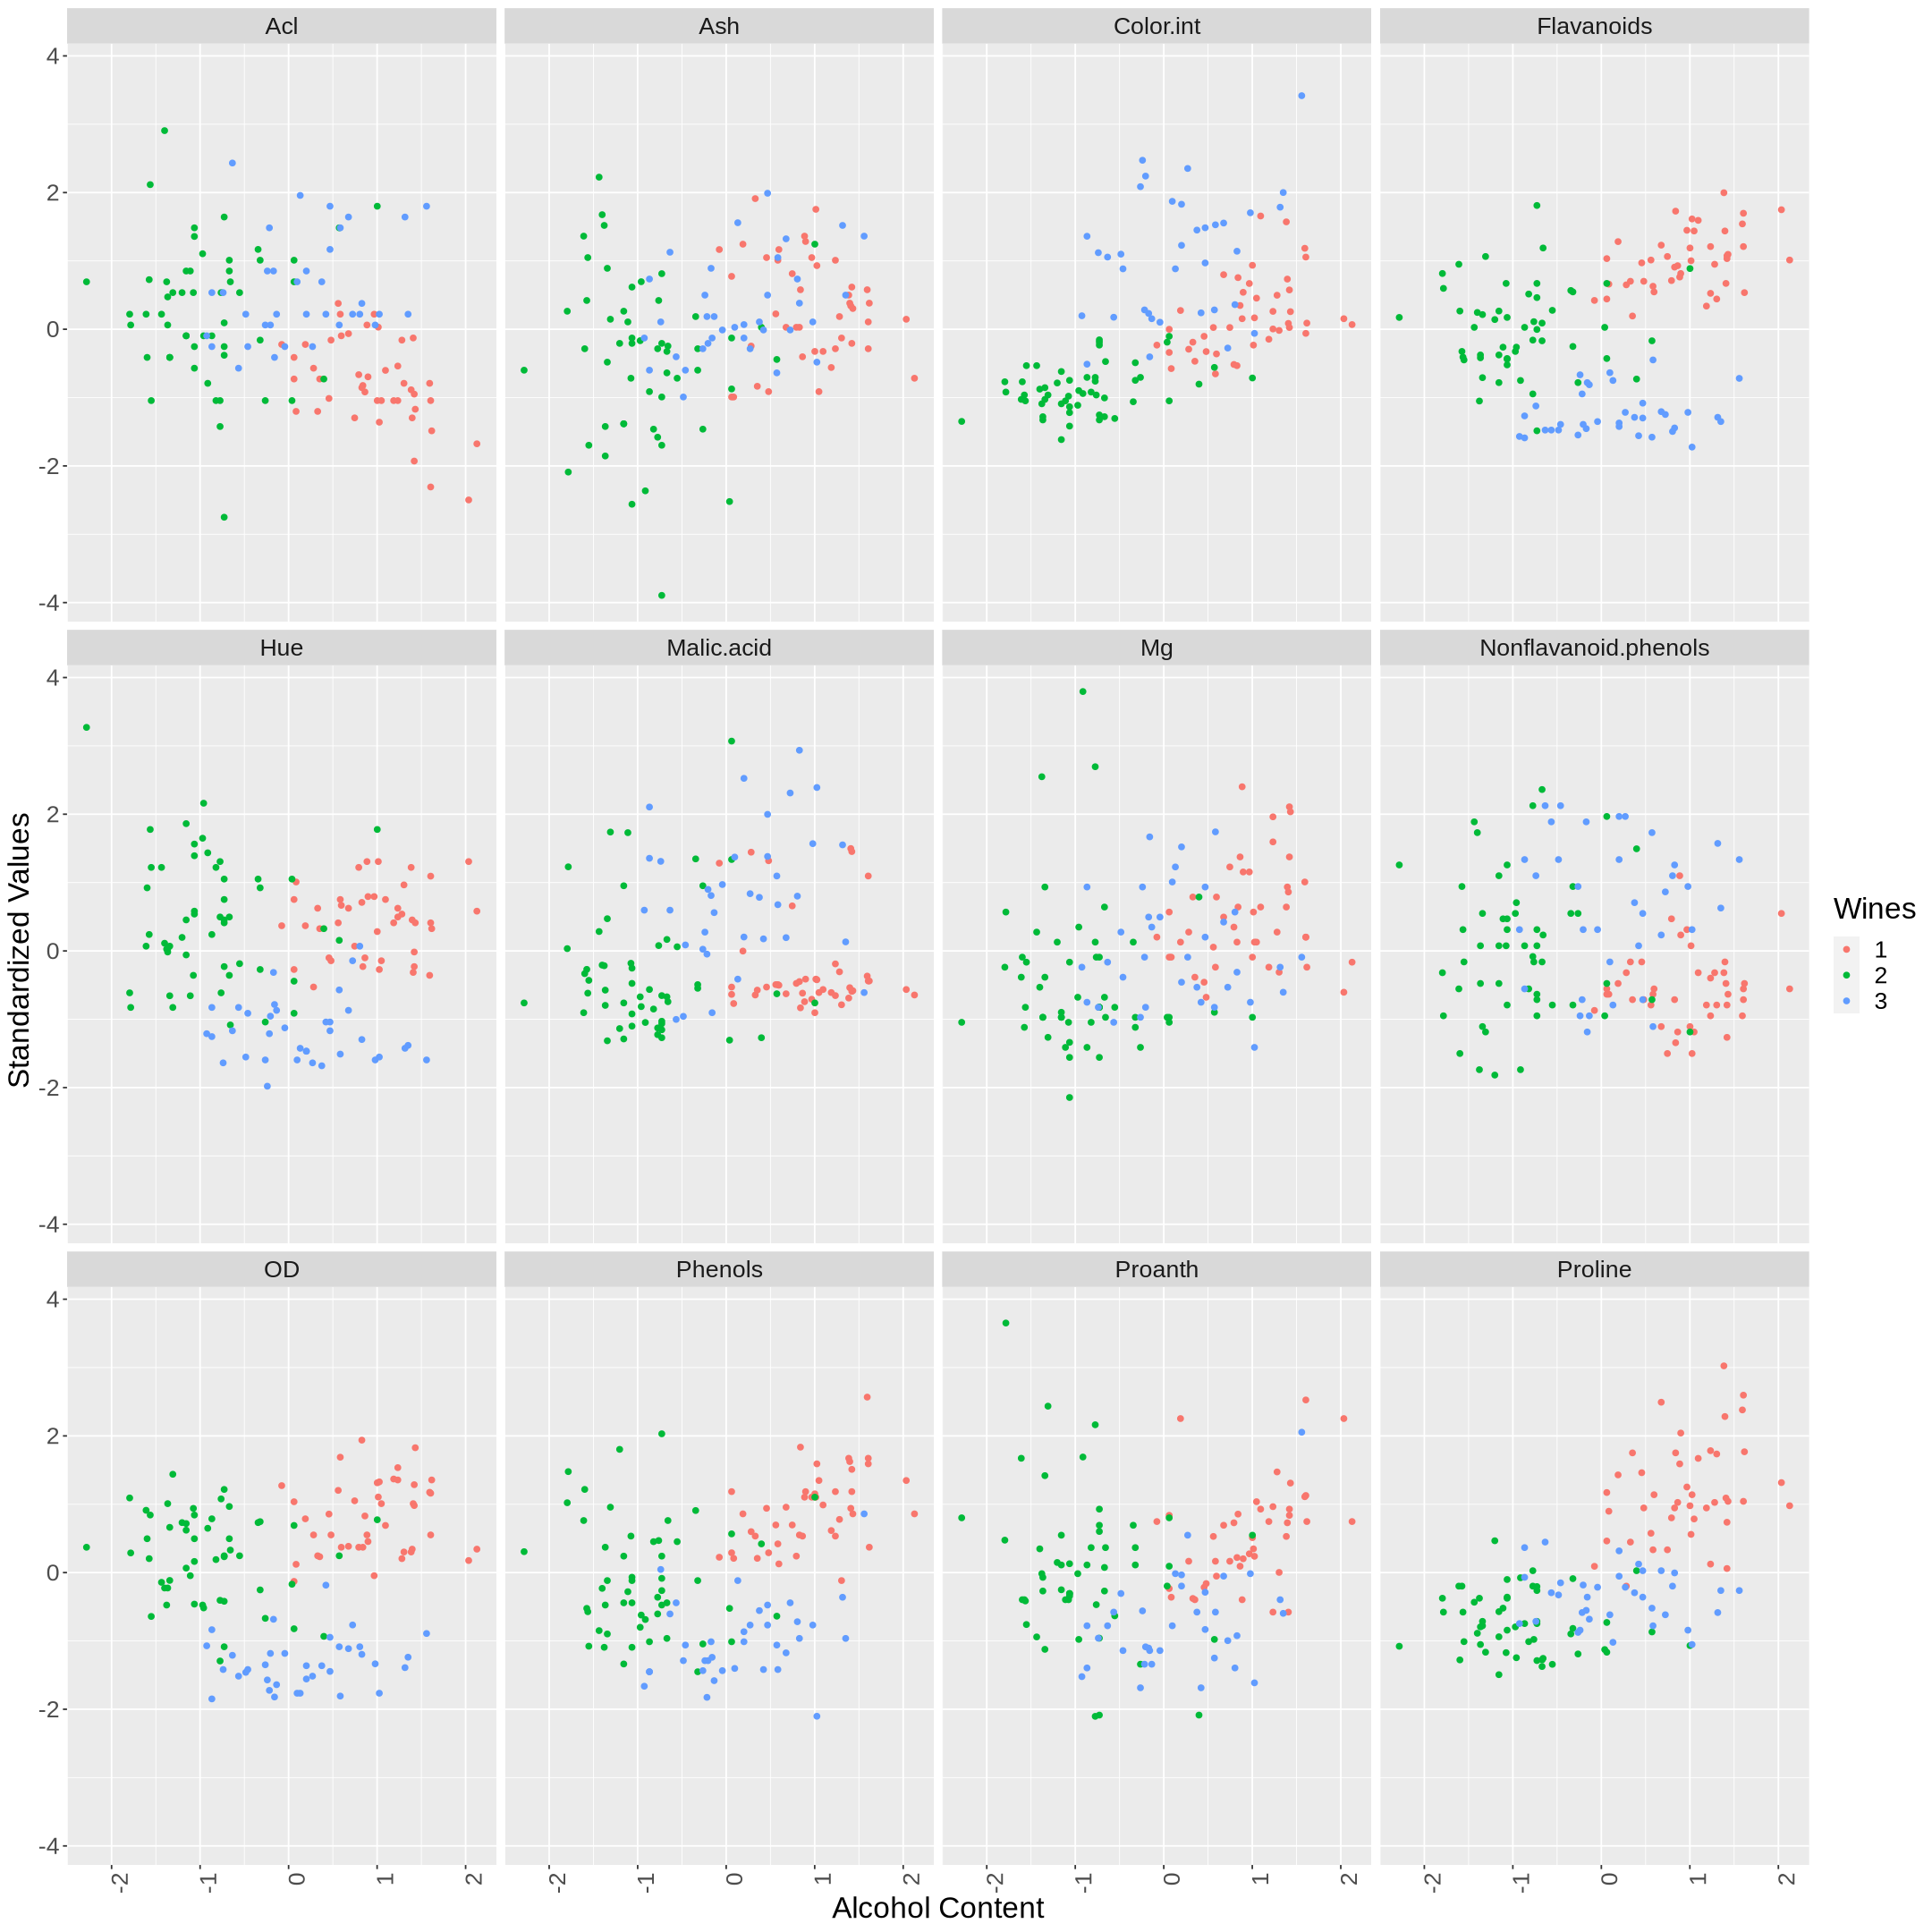

In [8]:
options (repr.plot.width = 18, repr.plot.height = 18)
wine_plot_facet <- wine_train_alcohol |>
    ggplot (aes (x = Alcohol, y = values, color = Wine)) +
    geom_point () +
    labs (x = "Alcohol Content",
          y = " Standardized Values",
          color = "Wines") +
    facet_wrap (~attributes) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    theme(text = element_text(size=20))
wine_plot_facet

**Method**

*Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction? Describe at least one way that you will visualize the results.*

**Expected Outcomes and Significance**

*What do you expect to find? What impact could such findings have? What future questions could this lead to?*